In [1]:
# In this practice, we use different pre-processing models and methods. This is relevant because the form in which
# data is expressed is as important as the analysis itself. Some ML algorithms and even test statistics require
# data to be standardised or normalised. Standarisation refers to making the data into a Gauss-like distribution
# with mean of 0 and Standard Deviation of 1. Normalisation refers to fitting the data into a 0 to 1 interval, 
# proportionally.

# Feature engineering: feature/variable selection, extraction or transformation to make data more sensible to analyse
# Feature scaling: changing the magnitude of data in order to make it more analysable (helping processes such as ML algorithms)

In [2]:
import pandas as pd
import scipy
import numpy as np
import sqlite3
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
sql = """
SELECT finishing, heading_accuracy, volleys, free_kick_accuracy, preferred_foot
FROM PLAYER_ATTRIBUTES
"""

con = sqlite3.connect("database.sqlite")

attributes = pd.read_sql_query(sql, con)

attributes.dropna(inplace = True)

Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy:

In [4]:
# Creació de dummy variables per a variables categòriques (peu predominant en aquest cas)

foot = pd.get_dummies(attributes["preferred_foot"])

foot.value_counts()

left  right
0     1        136953
1     0         44312
dtype: int64

Estandaritza els atributs numèrics amb StandardScaler:

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc81373a280>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc81373a940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc813713ee0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc813815040>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc8138153a0>,
 'means': []}

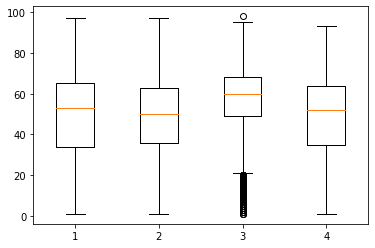

In [5]:
# [REFERENCE 1]
# CHECKING FOR AND ELIMINATING OUTLIERS IN ORDER TO STANDARDISE:

numerical_var = attributes[attributes.columns.difference(['preferred_foot'])]
    
plt.boxplot(numerical_var)


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc813f9b700>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc813f9bdc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc813f9b3a0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc8140704c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc814070820>,
 'means': []}

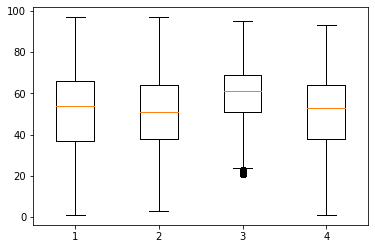

In [6]:
# [REFERENCE 2]
# Take the tails of the boxplot as a reference to delete outliers in ["heading accuracy"]

Q1= numerical_var["heading_accuracy"].quantile(0.25)
Q3 = numerical_var["heading_accuracy"].quantile(0.75)

IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

new_df = numerical_var[(numerical_var['heading_accuracy'] > lower) & (numerical_var['heading_accuracy'] < upper)]

plt.boxplot(new_df)


In [7]:
# Series/columns don't work one by one so I had to add the whole (modified) dataset

standard_variables = StandardScaler().fit_transform(new_df)

In [8]:
print(standard_variables.mean(axis = 0))
print(standard_variables.std(axis = 0))

# Success in standardising the numerical variables

[ 1.56795435e-16  1.56140757e-16 -9.54193512e-17 -9.82017337e-18]
[1. 1. 1. 1.]


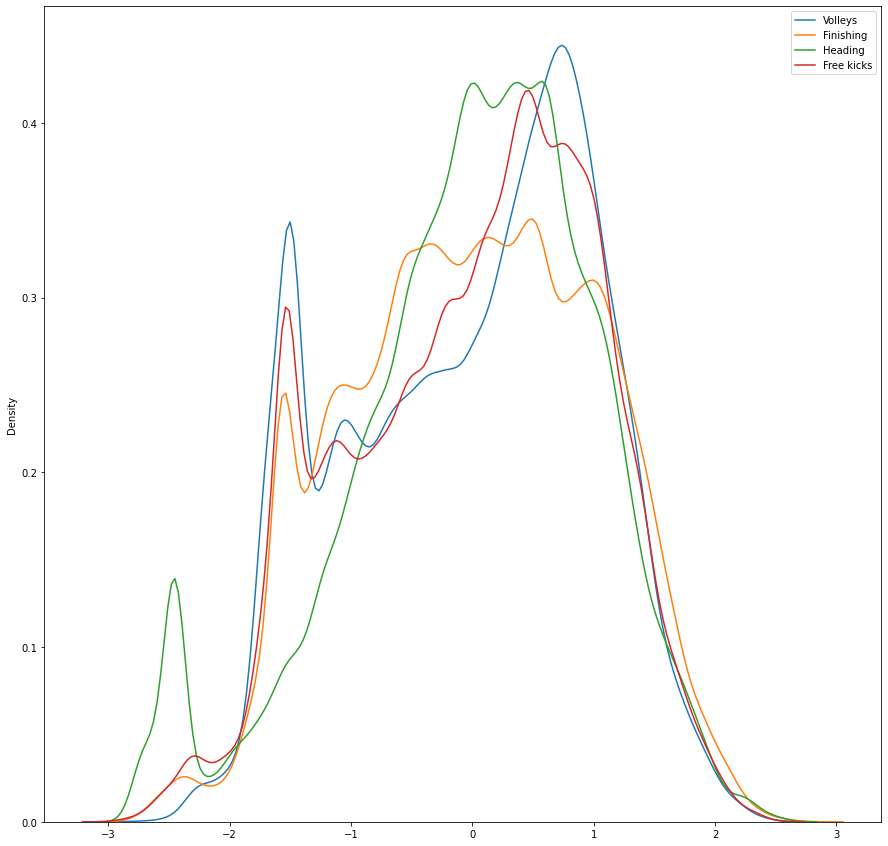

In [9]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 15))
                 
sns.kdeplot(standard_variables[:, 0])
sns.kdeplot(standard_variables[:, 1])
sns.kdeplot(standard_variables[:, 2])
sns.kdeplot(standard_variables[:, 3])
                 
plt.legend(labels=["Volleys", "Finishing", "Heading", "Free kicks"])

Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals:

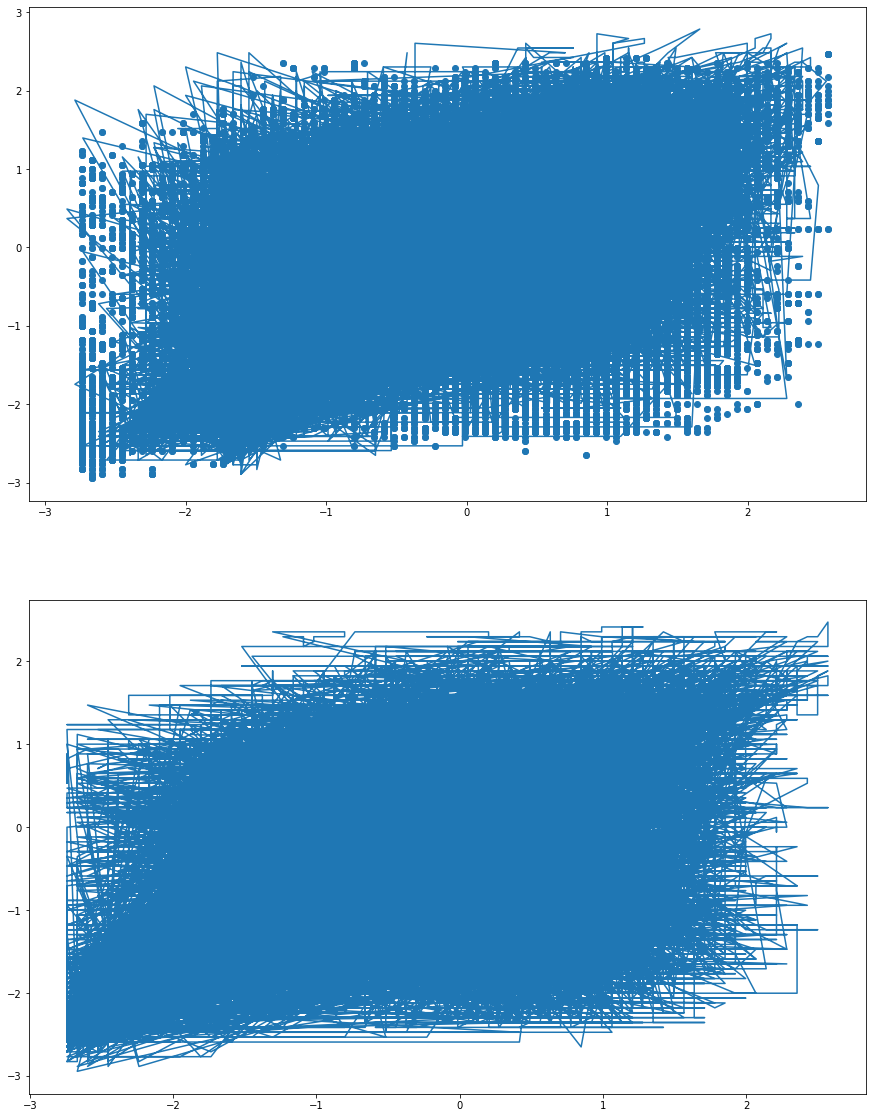

In [10]:
fig, ax = plt.subplots(figsize = (15, 20))

x = standard_variables[:, 0]
y = standard_variables[:, 1]
z = standard_variables[:, 2]
xx = standard_variables[:, 3]

plt.scatter(x, y)
plt.subplot(2, 1, 1)
plt.plot(x, y)

plt.scatter(z, xx) 
plt.subplot(2, 1, 2)
plt.plot(z, xx)

plt.show()

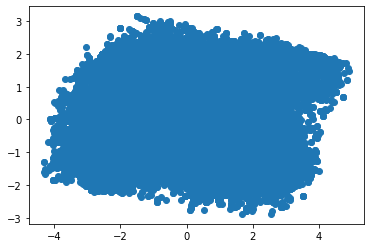

In [11]:
# Reduction from 4 (standardised) variables to 2 through the use of PCA:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(standard_variables)

pca_Df = pd.DataFrame(data = principalComponents, columns = ['Principal component 1', 'Principal component 2'])

plt.scatter(pca_Df['Principal component 1'], pca_Df["Principal component 2"])

In [12]:
# The two new variables explain 83.8% of the variance of the figure, which is relatively good

pca.explained_variance_ratio_

array([0.60294562, 0.2356875 ])

Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers:

In [13]:
# Outlier analysis and correction has already taken place in this very Jupyter Notebook; see [REFERENCE 1] and 
# [REFERENCE 2]. Only ["Heading Accuracy"] had to be corrected

standardised_df = pd.DataFrame(standard_variables, columns = ["volleys", "finishing", "heading_accuracy", "free_kick_accuracy"])

standardised_df.head()

,volleys,finishing,heading_accuracy,free_kick_accuracy
0,-0.424488,-0.718090,0.847692,-0.413513
1,-0.424488,-0.718090,0.847692,-0.413513
2,-0.424488,-0.718090,0.847692,-0.413513
3,-0.480773,-0.778522,0.775932,-0.472396
4,-0.480773,-0.778522,0.775932,-0.472396


In [14]:
# Normalise the data:

from sklearn.preprocessing import MinMaxScaler

normalised_var = MinMaxScaler().fit_transform(standardised_df)

normalised_var.mean(axis = 0)

array([0.52647683, 0.50938984, 0.51604224, 0.54372382])

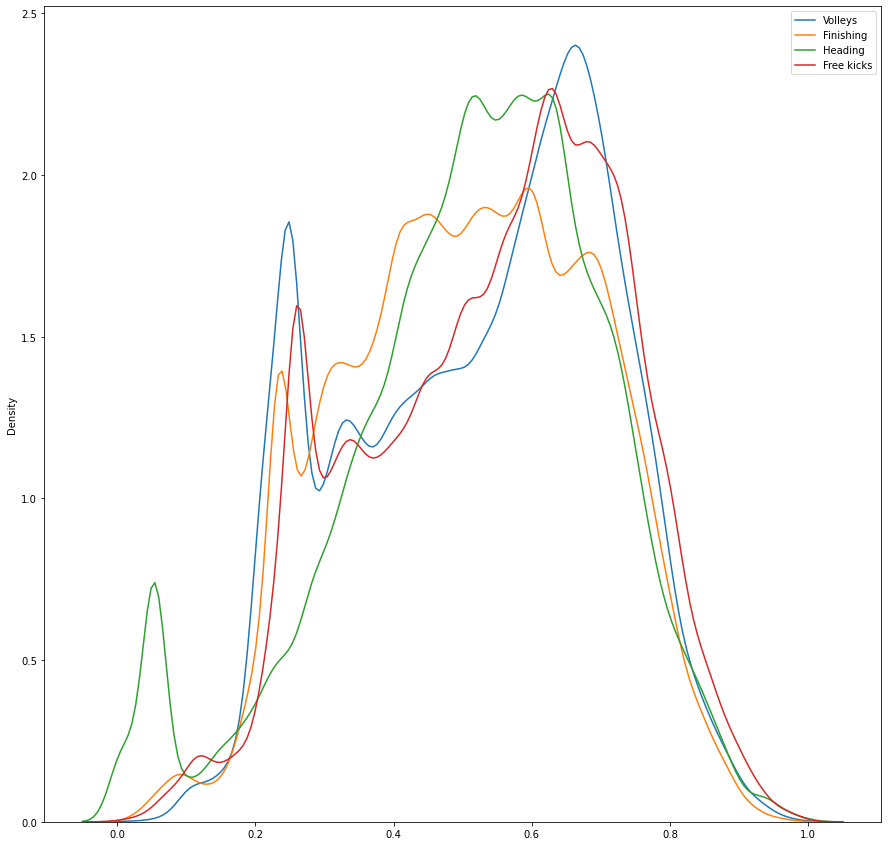

In [15]:
fig, ax = plt.subplots(figsize=(15, 15))
                 
sns.kdeplot(normalised_var[:, 0])
sns.kdeplot(normalised_var[:, 1])
sns.kdeplot(normalised_var[:, 2])
sns.kdeplot(normalised_var[:, 3])
                 
plt.legend(labels=["Volleys", "Finishing", "Heading", "Free kicks"])